## Analyse Gebäudevolumen / Geschossfläche

In [1]:
from typing import Final

import seaborn as sns
import src.package.importer as im
import src.package.consts as c
import src.package.charts as charts
import src.package.importer_usages as imp_usg

FIELD: Final = c.FIELD_VOLUME_TOTAL_416
FIELD_RATIO: Final = c.FIELD_GV_GF_RATIO
LABEL: Final = charts.LABEL_GV
LABEL_RATIO: Final = charts.LABEL_RATIO_GV_GF

charts.set_preferences(sns, font_scale=2)

df = im.get_extended_dataset('../../package/datasets/full_dataset.csv', cluster_threshold=10, hnf_gf_ratio=False)
df = im.calculate_gf_ratio(df, other_field=FIELD, ratio_field=FIELD_RATIO)
df, usages = imp_usg.extract_usage_details(df)
filtered_df = im.select_relevant_features(df)

### Allgemein

In [2]:
filtered_df[c.FIELD_AREA_MAIN_USAGE].describe()

count      419.000000
mean      3269.632458
std       4310.445809
min         75.000000
25%        719.500000
50%       1602.000000
75%       4049.500000
max      29437.000000
Name: area_main_usage, dtype: float64

In [3]:
filtered_df[c.FIELD_AREA_TOTAL_FLOOR_416].describe()

count      894.000000
mean      6384.539150
std       8584.172628
min         50.000000
25%       1423.250000
50%       3420.500000
75%       7695.000000
max      75328.000000
Name: area_total_floor_416, dtype: float64

### Visualisierungen
Zeigt **Gebäudevolumen** in relation zur **Geschossfläche**.

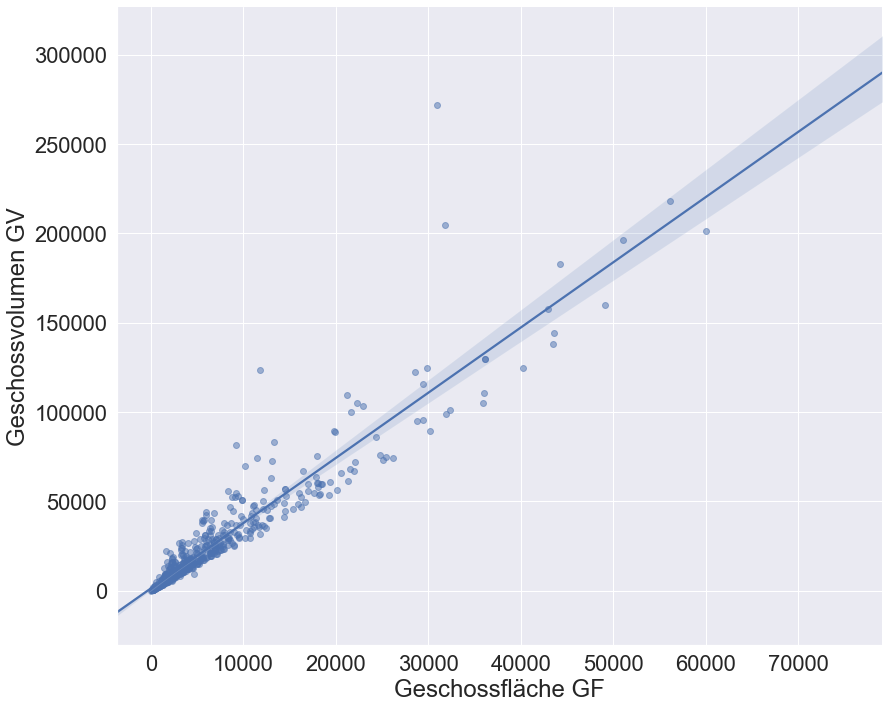

In [4]:
charts.lmplot_gf_field(filtered_df, field=FIELD, field_label=LABEL)

<AxesSubplot:xlabel='Geschossfläche GF', ylabel='Geschossvolumen GV'>

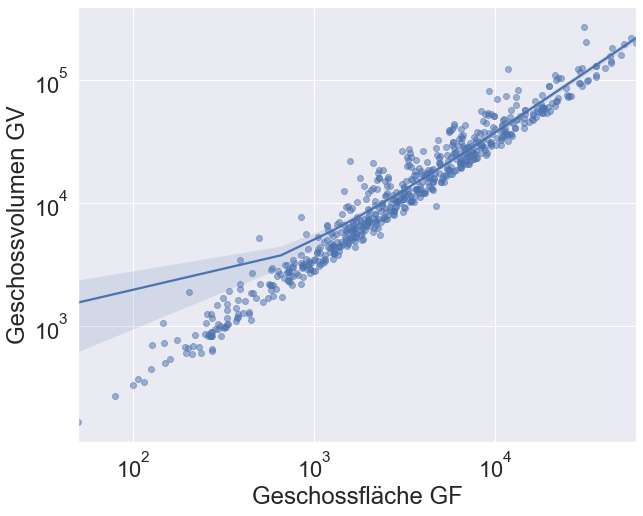

In [5]:
charts.regplot_gf_field(filtered_df, field=FIELD, field_label=LABEL, logscale=True)

#### 75% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


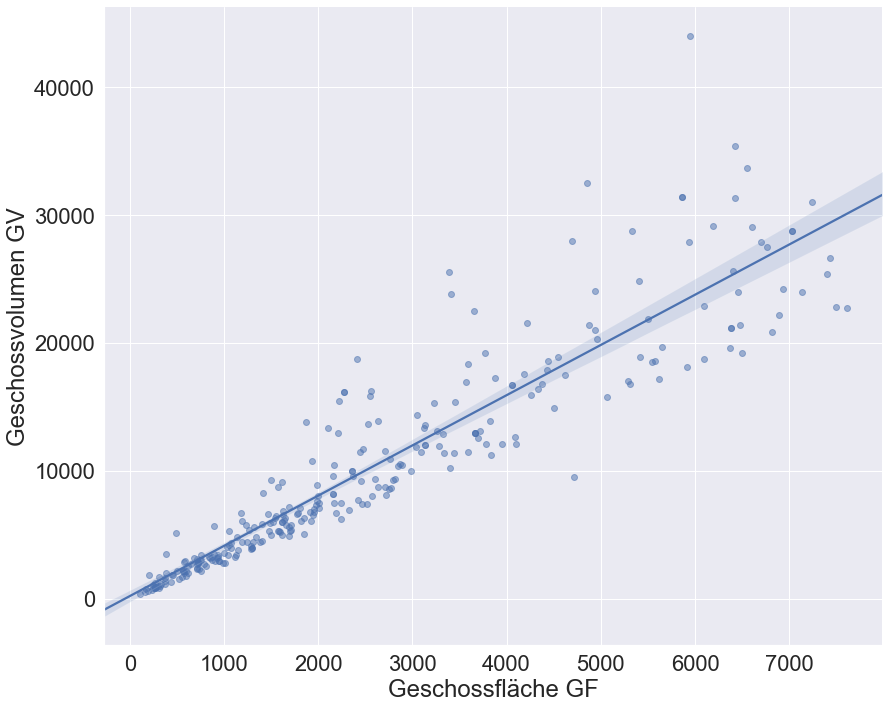

In [6]:
df_75_percentile = im.cap_upper_gf_field(filtered_df)
charts.lmplot_gf_field(df_75_percentile, field=FIELD, field_label=LABEL, ratio_label=FIELD_RATIO, percentile='75')

#### 25% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


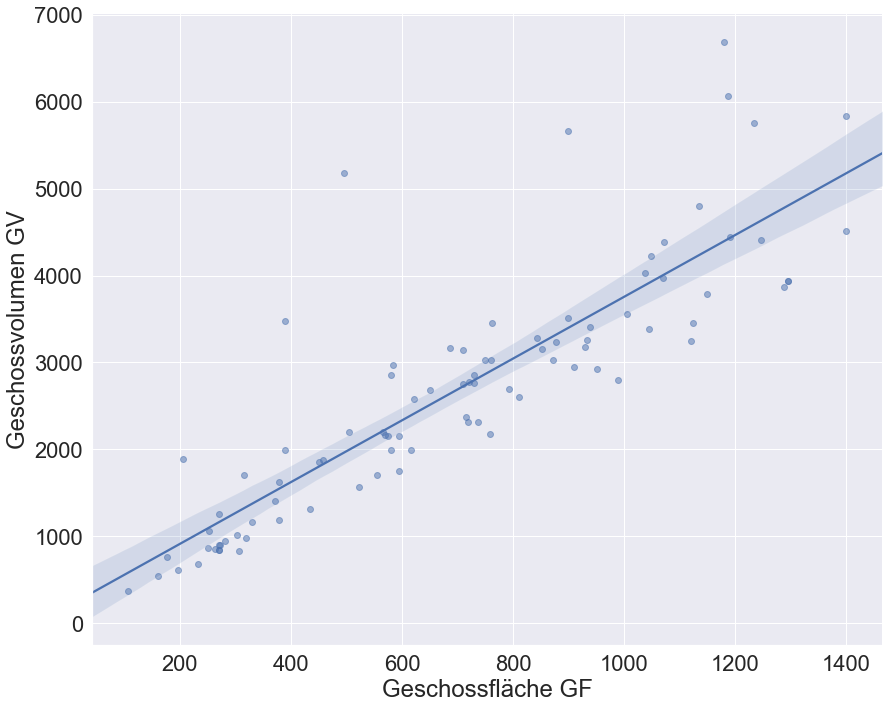

In [7]:
df_25_percentile = im.cap_upper_gf_field(filtered_df, upper_percentile='25%')
charts.lmplot_gf_field(df_25_percentile, field=FIELD, field_label=LABEL, ratio_label=FIELD_RATIO, percentile='25')

### Nach Kategorie
Ausgenommen: TECHNIK, GESUNDHEIT, OFFENE_BAUTEN

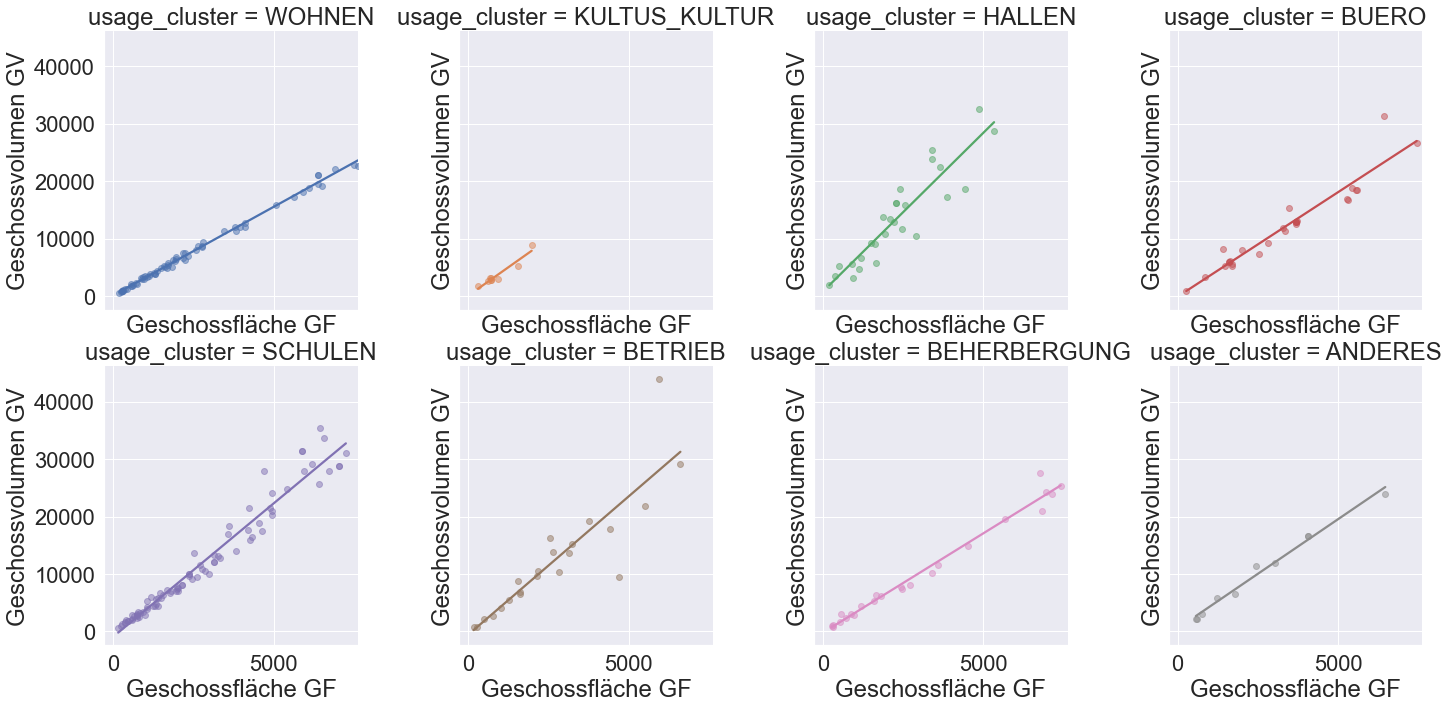

In [8]:
clusters_to_remove = ["TECHNIK", "GESUNDHEIT", "OFFENE_BAUTEN"]
df_75_percentile.drop(df_75_percentile[df_75_percentile[c.FIELD_USAGE_CLUSTER].isin(clusters_to_remove)].index, inplace=True)

charts.lmplot_clustered(df_75_percentile, y=FIELD, y_label=LABEL, ratio_label=FIELD_RATIO, save_label=f'{FIELD_RATIO}_75percentile')

### Beschreibung

In [9]:
charts.describe_ratios(df, ratio_field=FIELD_RATIO)

,count,mean,std,min,25%,40%,50%,75%,max
usage_cluster,,,,,,,,,
ANDERES,13.0,3.870198,0.483217,2.843602,3.636364,3.708231,3.798246,4.111248,4.689824
BEHERBERGUNG,36.0,3.357491,0.430216,2.546218,3.148189,3.280175,3.337201,3.488460,5.087329
BETRIEB,48.0,5.003709,1.869834,2.016129,3.987268,4.292745,4.382570,5.563548,13.937975
BUERO,70.0,3.638881,0.512665,2.900842,3.313437,3.437086,3.525484,3.836903,5.802817
HALLEN,70.0,6.149349,1.868269,2.612613,4.817093,5.974867,6.187697,7.087484,10.498811
KULTUS_KULTUR,16.0,4.007726,0.593731,3.076761,3.591058,3.855756,3.981370,4.331206,5.428571
SCHULEN,140.0,4.205085,0.638095,2.784722,3.778466,3.951196,4.090068,4.573047,7.204082
WOHNEN,195.0,3.144654,0.303231,2.296703,2.963503,3.062574,3.095207,3.309660,4.890625


### Violinplot
Zeigt Ratios verschiedener Cluster inkl. Verteilung.<br>
Unterteilung in umgekehrte Perzentile (also Grösser als).<br>

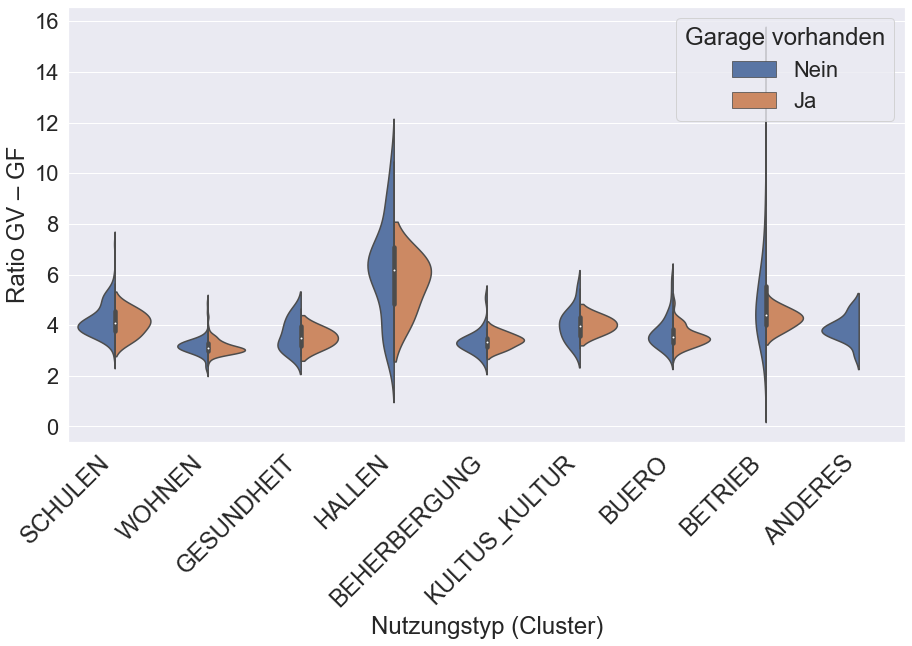

In [10]:
charts.violinplot_ratios(df, ratio_field=FIELD_RATIO, ratio_label=LABEL_RATIO)

## Benchmarks
Benchmarks zu den Ratio – nach Cluster.<br>

Ratios sind in **30%** der Fälle grösser als x

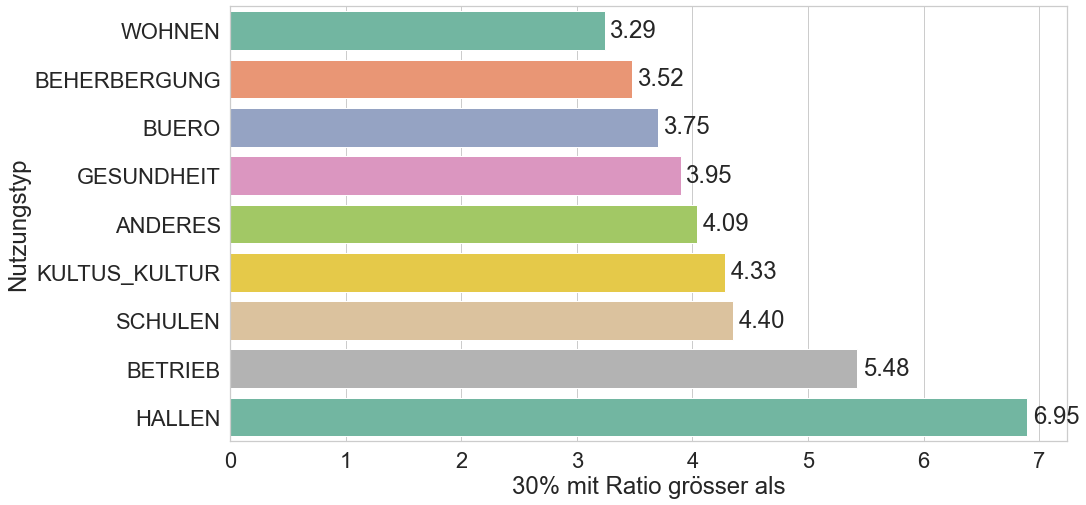

In [11]:
ratio_data = df[FIELD_RATIO]
charts.barplot_reversed_percentiles(ratio_data, df, ratio_field=FIELD_RATIO, percentile=70)

Ratios sind in **60%** der Fälle grösser als x

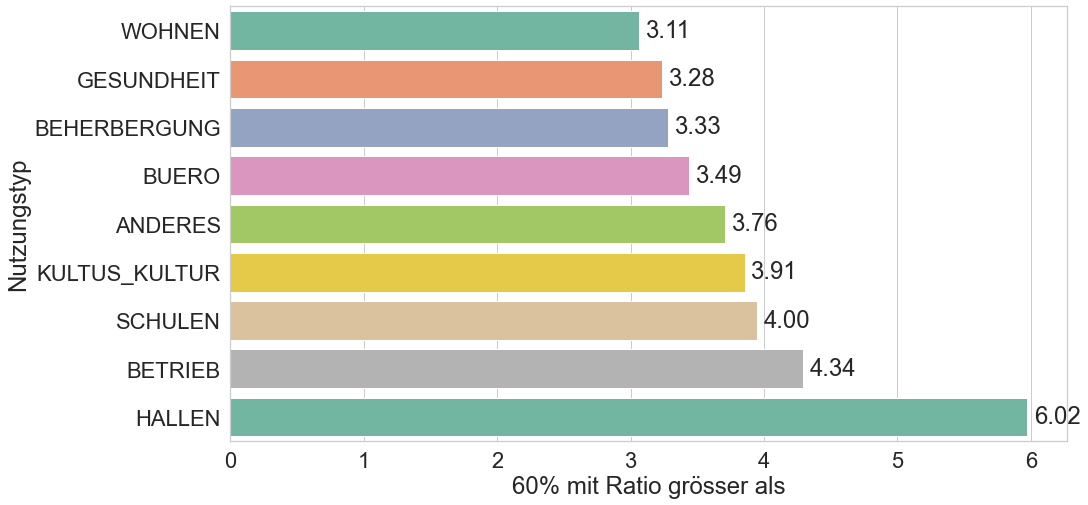

In [12]:
charts.barplot_reversed_percentiles(ratio_data, df, ratio_field=FIELD_RATIO, percentile=40)

Ratios sind in **70%** der Fälle grösser als x

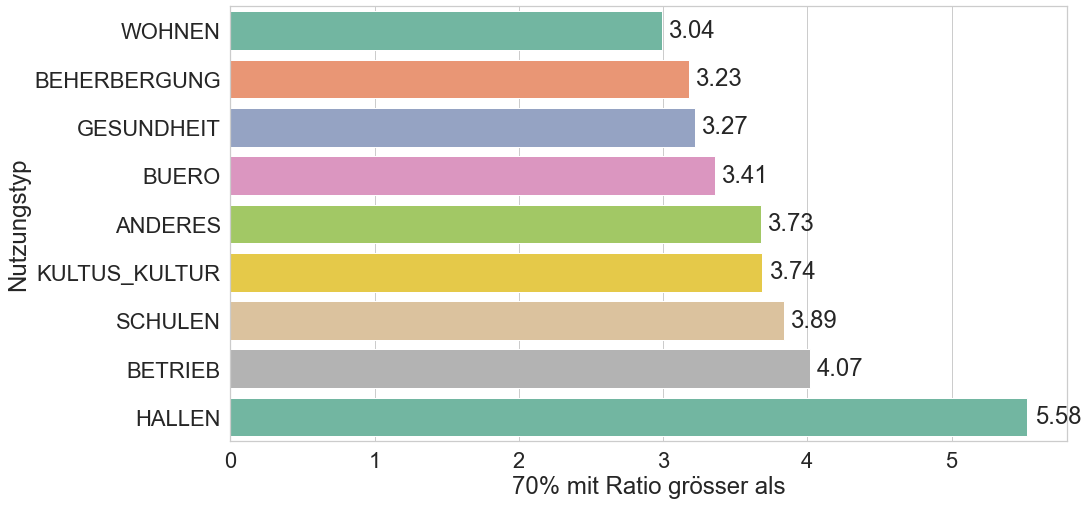

In [13]:
charts.barplot_reversed_percentiles(ratio_data, df, ratio_field=FIELD_RATIO, percentile=30)